In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## 統計の基礎    
**統計**(statistics)は、標本を調べることで母集団の性質を明らかにすることを目的として、個々の要素を標本化(サンプリング、sampling)してこれを分析し、母集団の性質を数量的に表すことである。本章では、必要最低限の統計として推定・検定について説明する

### 統計とは   
**母集団(population)**の特徴を表すのが**母数(parameter)** $\theta$である。母数は**母平均($\mu$) (population mean)**, **母分散($\sigma^2$) (population variance)**などいくつか候補がある。      
母集団が全てを知ることができない場合にはこれらの要素をいくつが抽出する。これを**標本化(sampling)**といい、得られた物を**標本(sample)**という。この標本に対してなんらかの分析を行い母数を推定することを**統計(statistics)**である。    
標本から計算される数値(標本平均、標本標準偏差など)を**統計量(statictic)**という。標本は母集団の一部であるので統計量を通して母数を推定していく。   

### 推定    
標本から得られた統計量をもとにして、母数の存在する範囲を求めることを**統計的推定(statistical inference)**という。推定には一つの値を推定する**点推定**と範囲を指定する**区間推定**がある。    

#### 点推定
**点推定(point estimation)**とは、母集団の母数を一つの値で推定する方法である。点推定の望ましい性質として不偏性、一致性、有効性がよく用いられる。    
    
##### 不偏推定量     
不偏性とは推定量$\hat{\theta}$の期待値が母数$\theta$に一致することである。すなわち
$$
E[\hat{\theta}] = \theta
$$
が成立する時推定量$\hat{\theta}$を**不偏推定量(unbiased estimator)**と呼ぶ。この性質を持つとき、$\theta$の周りに$\hat{\theta}$が分布する。    
(推定値が真値より大きめに推定されやすかったり少なめに推定されやすいことはない)       
(推定量がどれだけ真値に近づくかについては一致性である)     
母平均$\mu$と母分散$\sigma^2$の点推定として、標本平均$\hat{\mu}$と標本分散$\hat{\sigma}^2$の計算式は次のように示される。     
$$
\hat{\mu} = \frac{1}{N} \displaystyle \sum_{i=1}^{N} x_i    \\
\hat{\sigma}^2 = \frac{1}{N-1} \displaystyle \sum_{i=1}^{N} (x_i - \hat{\mu})^2
$$
(標本分散では$N$で割るが不偏分散では不偏性を確保するのに$N-1$で割っていることに注意。証明は以下)       
     
標本平均の期待値については     
$$
\begin{align}
E[\hat{\mu}] &= \frac{1}{N} E[\displaystyle \sum_{i=1}^{N} x_i] \\
             &= \frac{1}{N}N \mu \\
             &= \mu
\end{align}
$$    
これより、標本平均は不偏推定量である。    
     
次に標本分散の期待値について考えると   
$$
\begin{align}
E[\hat{\sigma}^2] &= E[\frac{1}{N-1} \displaystyle \sum_{i=1}^{N} (x_i - \hat{\mu})^2] \\
                  &= \frac{1}{N-1}E[\displaystyle \sum_{i=1}^{N} \{ (x_i - \mu)^2 - (\hat{\mu} - \mu)^2 \}] \\  
                  &= \frac{1}{N-1} \{ E[\displaystyle \sum_{i=1}^{N}  (x_i - \mu)^2] - nE[(\hat{\mu} - \mu)^2 ] \} \\ 
                  &= \frac{1}{N-1} \{ E[\displaystyle \sum_{i=1}^{N}  (x_i - \mu)^2] - nV[\hat{\mu}] \} \\ 
                  &= \frac{1}{N-1}(N \sigma^2 - n \cdot \frac{\sigma^2}{n}) \\
                  &= \sigma^2
\end{align}
$$    

(中心極限定理より標本平均$\hat{\mu}$の分散$V[\hat{\mu}] = \frac{\sigma^2}{n}$となる)     
となり、$\hat{\sigma}^2$は不偏推定量となる。(標本分散の式で記述統計のNでわると不偏分散とならずやや少なめに算出されることがわかる)      

(array([ 0.,  0.,  1.,  1.,  0.,  3.,  4.,  9., 15., 15., 15.,  9.,  9.,
         8.,  5.,  3.,  1.,  1.,  1.,  0.]),
 array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ,
        2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ]),
 <a list of 20 Patch objects>)

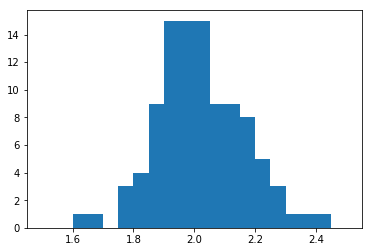

In [13]:
# 標本平均を実際に見てみる
# シードを1に設定
np.random.seed(1)  

# 母集団がmean = 2, std = 0.5の正規分布に従うと仮定
mean, std = 2, 0.5

# サンプル数Nの標本をnum個作成して標本平均のヒストグラムを作る
num = 100
N = 10

#  空ベクトルを作成
mu = np.zeros(num)

for i in range(num) : 
    mu[i] = np.mean(scipy.stats.norm.rvs(loc = mean, scale = std, size = N))

plt.hist(mu, bins = 20, range = (1.5, 2.5))

この結果から平均の予測値が与えられた真の平均値の周りに分布していることがわかる。    

##### 標本分散の自由度     
確率変数の$自由度(degree of freedom, DoF)$とは、大雑把にはいくつの変数を勝手に(自由に)その値を動かしていいかを測る指標である。    
例えば、標本$\{ x_i \}, (i = 1 \sim N)$に対して、$N=1$であってもこの標本平均は計算できる。すなわち、$N$個の標本を自由にしても良いから自由度は$N$と言える。   
次に標本分散の計算式を考えると$N = 1$では標本分散は0となり、意味を持たない。最低$N \geq 2$でないと標本分散は計算できない。よって標本数のうち一つは自由に使うことはできず、標本分散の自由度は$N-1$となる。   

##### 一致性    
標本の数が増えるに従って$\hat{\theta}$は対応する母数に近づくことが望ましい。つまり    
$$
\lim_{N \to \infty} P(|\hat{\theta}_N - \theta| < \varepsilon) = 1
$$
このような$\hat{\theta}$を**一致推定量(consistent estimator)**という。
    
標本平均は一致推定量であり、標本平均の分散を考えると    
$$
E[(\hat{\mu} - \mu)^2] = \frac{1}{N}\sigma^2
$$
これにより$N \to \infty$とともに0となるから、一致推定量となる。

#### 区間推定     
標本平均や標本分散は母平均や母分散の周りに分布するが、それらがどれくらいの確率でどれほどの区間に収まるかを考えるのが**区間推定(interval estimation)**という。この考えに対する指標の一つとして信頼区間がある。    
      
##### 信頼区間(confidence interval)     
信頼区間は$(1-\alpha)$の確率(または信頼度)で真の母数の値$\theta$が区間$[L, U]$に入る区間のことという。つまり    
   
$$
P(L \leq \theta \leq U) = 1 - \alpha
$$   
(この程度の区間をとれば、何回もsamplingを繰り返したとき$1-\alpha$の確率で区間内に真値$\theta$が存在する)    
ここに、$L, U$はそれぞれ**下側信頼限界(lower confidence limit)**、**上側信頼限界(upper confidence limit)**、$1-\alpha$は**信頼度(confidence level)**、区間$[L, U]$を**$100(1-\alpha)$信頼区間**と呼ぶ。    
       
$1-\alpha$は目的に応じて適切な値が選ばれるが、通常は$0.90, 0.95, 0.99$が選ばれることが多く、$\alpha$はそれぞれ$0.10, 0.05, 0.01$となる。   
また確率分布が正規分布のような左右対称の場合は信頼区間$[L, U]$をパーセント点の表記$[-z_{\alpha/2}, z_{\alpha/2}]$に置き換えて考える。   

In [3]:
# 標準正規分布における99%信頼区間を考える
# alpha = 0.01(99%信頼区間)
alpha = 0.01  

# 標準正規分布の90%信頼区間を出す
za, zb = scipy.stats.norm.interval(alpha = (1 - alpha), loc = 0, scale = 1)

print("za = ", za, ", zb =", zb)

za =  -2.5758293035489004 , zb = 2.5758293035489004


#### 母平均の信頼区間
+ **母分散$\sigma^2$が既知の場合**     
母集団の平均が$\mu$、母分散が$\sigma^2$である時、標本平均は次のように表せられる。   

$$
\hat{\mu} = \frac{1}{N}(x_1+x_2+\cdots+x_N)
$$

$\hat{\mu}$は正規分布$N(\mu, \sigma^2/N)$に従うのでこれを標準化した$z$を考えると   

$$
z = \frac{\hat{\mu}-\mu}{\sigma/\sqrt{N}} = \frac{\hat{\mu}-\mu}{SE(\sigma, N)}  \\
SE(\sigma, N) = \frac{\sigma}{N}
$$

次に信頼区間は以下のように表される。   

$$
\begin{align}
1-\alpha &= P(-z_{\alpha/2}\leq z \leq z_{\alpha/2}) \\
         &= P(\hat{\mu}-z_{\alpha/2}\cdot SE(\sigma, N) \leq \mu \leq \hat{\mu}+z_{\alpha/2}\cdot SE(\sigma, N)) 
\end{align}
$$

以上より$\mu$の信頼度$1-\alpha$の信頼区間は$[\hat{\mu}-z_{\alpha/2}\cdot SE(\sigma, N), \hat{\mu}+z_{\alpha/2}\cdot SE(\sigma, N)]$となる。  
    
+ **母分散$\sigma^2$が未知の場合**    
母分散がわからないときは不偏の標本分散$\hat{\sigma^2}$を用いて新たな確率変数$t$を定義する。   

$$
t = \frac{\hat{\mu}-\mu}{\hat{\sigma}/\sqrt{N}} = \frac{\hat{\mu}-\mu}{SE(\hat{\sigma}, N)}
$$

証明は割愛するが母集団が正規分布に従うときこの$t$は自由度$N-1$の$t$分布にしたがう。先程と同様に       

$$
\begin{align}
1-\alpha &= P(-t_{\alpha/2}\leq t \leq t_{\alpha/2}) \\
         &= P(\hat{\mu}-t_{\alpha/2}\cdot SE(\hat{sigma}, N) \leq \mu \leq \hat{\mu}+t_{\alpha/2}\cdot SE(\hat{\sigma}, N)) 
\end{align}
$$

以上より$\mu$の信頼度$1-\alpha$の信頼区間は$[\hat{\mu}-t_{\alpha/2}\cdot SE(\hat{\sigma}, N), \hat{\mu}+t_{\alpha/2}\cdot SE(\hat{\sigma}, N)]$となる。   

信頼区間については以下の関係がある。    
+ 信頼度を大きくすれば信頼区間が広がる。また逆も然りである。(高すぎる信頼度はあまり意味をなさない)    
+ $SE(\sigma, N)$, $SE(\hat{\sigma}, N)$ともに$N$の増加とともに小さくなり信頼区間が狭くなる。つまり標本数を増やせばその分母平均の絞り込みができる。

In [25]:
# 例題
# 小学校のある学年の全国児童数を１１０万人、N=10人を無作為抽出して標本平均が145.2、標本標準偏差が23.7とした時の信頼区間を求める
N, mu_hat, std_hat = 10, 145.2, 23.7

# 信頼度0.99, 0.95, 0.90におけるt分布の区間
list_interval = list(map(lambda x: scipy.stats.t.interval(x, df = N - 1), (0.99, 0.95, 0.90)))
#  信頼度0.99, 0.95, 0.90におけるt分布の区間と信頼度をzipにしてiteraterに
zip_interval = zip(["0.99", "0.95", "0.90"], list_interval)

# 標準誤差
se = std_hat / np.sqrt(N)

# それぞれの信頼区間を出力
for i, j in zip_interval: 
    print("1-alp = " + i + ", interval: " + str(mu_hat + j[0] * se) + ", " + str(mu_hat + j[1] * se))

1-alp = 0.99, interval: 120.84378885405553, 169.55621114594445
1-alp = 0.95, interval: 128.24604132892404, 162.15395867107594
1-alp = 0.90, interval: 131.46155538107368, 158.9384446189263


当然ながら信頼度が上がるに従い信頼区間は広まることがわかる。   

#### 母比率の信頼区間   
今回は標本比率が二項分布にしたがる場合の母比率の信頼区間を考える。試行回数が$N$、ある事象が発生する確率を$p$とするとき、二項分布に従う確率分布を$X \sim B(N, p)$とすると、この平均値と分散はそれぞれ次のようになる。  

$$
E[X] = Np   \\
V[X] = Np(1-p)
$$

また、$N$が十分大きいときは中心極限定理より$X$は正規分布$N(Np,Np(1-p))$に従うので、これを標準化した$z$を考えると   

$$
z = \frac{X-Np}{\sqrt{Np(1-p)}} \sim N(0,1)
$$

この式を変形し、    

$$
z = \frac{1/N}{1/N} \cdot \frac{X-Np}{\sqrt{Np(1-p)}} = \frac{\frac{X}{N}-Np}{\sqrt{\frac{p(1-p)}{N}}} = \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{N}}} \sim N(0,1)
$$   

よって上記より

$$
\begin{align}
1-\alpha &= P(-z_{\alpha/2} \leq z \leq z_{\alpha/2})  \\
         &= P(\hat{p}-z_{\alpha/2}\cdot \sqrt{\frac{p(1-p)}{N}} \leq p \leq \hat{p}+z_{\alpha/2}\cdot \sqrt{\frac{p(1-p)}{N}})
\end{align}
$$

$N$が十分大きければ$\hat{p}$は$p$にほぼ一致するので母比率$p$の信頼度$1-\alpha$の信頼区間は$[\hat{p}-z_{\alpha/2}\cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}, \hat{p}+z_{\alpha/2}\cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}]$となる    

In [28]:
# 例題
# 内閣支持率を調べるためにサンプル数1000人の調査を行ったところ支持する人は550人であった。支持率の95%信頼区間を求める。   
N, p_hat = 1000, 550 / 1000

# z分布の95%信頼区間
za, zb = scipy.stats.norm.interval(alpha = 1 - 0.95, loc = 0, scale = 1)

print("95% confident interval: " + str(p_hat + za * np.sqrt(p_hat * (1 - p_hat) / N)) + 
      ", " + str(p_hat + zb * np.sqrt(p_hat * (1 - p_hat) / N)))

95% confident interval: 0.5490134886467938, 0.5509865113532063


In [30]:
# N数を増やしたとき...
N, p_hat = 4000, 1000 / 4000

# z分布の95%信頼区間
za, zb = scipy.stats.norm.interval(alpha = 1 - 0.95, loc = 0, scale = 1)

print("95% confident interval: " + str(p_hat + za * np.sqrt(p_hat * (1 - p_hat) / N)) + 
      ", " + str(p_hat + zb * np.sqrt(p_hat * (1 - p_hat) / N)))

# 信頼区間は確かに狭くなっている

95% confident interval: 0.24957067604015043, 0.25042932395984957


### 仮説検定    
**仮説検定(hypothesis testing)**とは、ある仮説に対して、それが正しいのか否かを統計学的に検討する方法である。例えば新薬の効果があるかどうかを評価するとき、仮説検定に基づくと以下の二つの仮説が立てられる。     

+ **帰無仮説(null hypothesis)** $H_0$: 薬の効き目がない   
+ **対立仮説(alternative hypothesis)** $H_1$: 薬の効き目がある

何らかの検定をして$H_0$が正しくないと判断することを**$H_0を棄却する(reject)$**という。この場合、$H_1$を正しいとして**採用する(accept)**される。  
これらのreject/acceptに関しては以下のように判断の誤りが起こる可能性がある。   

|判断|$H_0$が正しい|$H_1$が正しい|
|---|---|---|
|$H_0$を棄却|type-1 error|正しい|
|$H_0$を棄却しない|正しい|type-2 error|   

+ type-1 error($\alpha$ error): 新薬の効果がないのに効果があると判断した    
+ type-2 error($\beta$ error): 新薬の効果があるのに効果がないと判断した  

ここで棄却の解釈についてであるが、$H_0$を棄却したときは$H_1$を採用することは問題ないが、$H_0$を棄却しなかったからといって$H_0$が正しいと判断することはできない。   
    
**有意水準**   
**有意水準(significance level)**とは仮説検定を行う時に帰無仮説を棄却するかを判定する基準である。帰無仮説$H_0$を棄却した時にtype-1 errorを起こす確率を有意水準$\alpha$とする。つまり$\alpha=5\%$なら同じ状況下で検定を行うと20回に1回はtype-1 errorが発生する。   
有意水準を小さくして帰無仮説が棄却されにくくなると正しくない仮説を受容する危険性が増す。つまり有意水準を小さくしてtype-1 errorを起こしにくくすると代償にtype-2 errorが起こりやすくなる。　　　　　
    
+ **仮説検定まとめ**   

    1. 命題をたてる。   
    1. 命題に適する検定統計量を算出する。   
    1. 帰無仮説$H_0$とこれを否定する対立仮説$H_1$をたてる。   
    1. 有意水準$\alpha$を決める(5%, 1%など)   
    1. 用いた検定統計量が示す確率分布から確率$p$を求める(検定では$p$値と呼ぶことが多い)   
    1. $p < \alpha$なら$H_0$が正しいと仮定して算出した検定統計量より極端な値になる確率が極めて低いことから前提条件の$H_0$が誤っていると判断し$H_0$を棄却して$H_1$を採用する。   
    1. $p>\alpha$なら$H_0$を棄却しない。サンプル数・分析方法などを見直して再検定の実施を考える。   

#### 変速検定と両側検定    
帰無仮説を$H_0:\mu=2.0$とした時  
+ 両側検定 $H_1: \mu \neq 2.0$ ($\mu$は大きいか小さいかのいずれかに含まれるか否かを考える)   
+ 片側検定 $H_1: \mu > 2.0 \ or \ \mu < 2.0$   

ちなみに片側検定は大小関係の前提条件があるので帰無仮説が棄却されやすい。特に指定がなければ一般的に両側検定を用いいる。   

#### 母平均の検定   
標本$\{x_i\}$, $(i=1\sim N)$が互いに独立で正規分布$N(\mu_0, \sigma^2)$に従っていると仮定する。母集団の母平均が$\mu_0$であるかを検定したい。ここで母分散$\sigma^2$が既知の場合と未知の場合、それぞれに対応する検定統計量は以下の通り。   

+ 母分散$\sigma^2$が既知の場合(z検定)   
$$
z = \frac{\hat{\mu}-\mu_0}{\sigma/\sqrt{N}} \sim N(0, 1)
$$
+ 母分散$\sigma^2$が未知の場合(t検定)
$$
t = \frac{\hat{\mu}-\mu_0}{\hat{\sigma}/\sqrt{N}} \sim t(N-1)
$$   

z検定について定性的に考えると$|z|$が大きいと棄却する確率が高まる。つまり$\hat{\mu}-\mu_0$の差が大きいか分散$\sigma$は一定なので$N$が大きくなれば棄却の可能性が高くなる。    
cf) N数が大きくなればt分布はz分布に近くのでt検定の代わりにより計算が簡単なz検定を近似的に用いるという方法もあるが現在はコンピューターによる計算処理が発達しているので可能ならt検定を用いる方が望ましい。   

In [2]:
# example
# ある会社の精密部品の直系の規格は1.54cmである。製造したものから8個サンプリングして測定した直径が以下の通り
data = np.array([1.5399, 1.5390, 1.5399, 1.5395, 1.5400, 1.5390, 1.5399, 1.5399])

# この製品が規格通りか有意水準0.05で検定する
mu = np.mean(data) # mean
sd = np.std(data, ddof = 1) # unbiased sd
N = len(data) # sample size
m0 = 1.54 # hypothesis

t_stat = (mu - m0) / (sd / np.sqrt(N)) #t統計量

# caluculating p-value
if t_stat >= 0 : 
    p = 1 - scipy.stats.t.cdf(t_stat, N - 1) 
else : 
    p = scipy.stats.t.cdf(t_stat, N -1)

print("t = ", t_stat)
print("p-value = ", 2 * p)

t =  -2.4373067467182707
p-value =  0.04493615922381196


#### 母分散の検定   
標本$\{x_i\}$, $(i=1\sim N)$が正規分布$N(\mu_0, \sigma^2)$に従っていると仮定する。この$\mu$, ${\sigma}^2$の両方が未知の時、母分散が仮定する${\sigma_0}^2$に等しいか否かを検定するのが母分散の検定である。次の検定統計量を導入する。    

$$
\chi^2=\frac{N-1}{{\sigma_0}^2} \hat{\sigma}^2 \sim \chi^2(N-1)
$$  

この標本分散$\hat{\sigma}^2$は不偏分散。上記の統計量は自由度$(N-1)$のカイ二乗分布に従う。    

In [17]:
# example
# 先ほどの例において規格では分散1x10^-7mm以下としている。精密部品の母標準偏差がこの規格からずれているか有意水準5%で検定する 

# 先ほどのデータ
data = np.array([1.5399, 1.5390, 1.5399, 1.5395, 1.5400, 1.5390, 1.5399, 1.5399])

var = np.var(data, ddof = 1)    # 標本の不偏分散
print("variance = {}".format(var))

var0 = 1.e-7    # 規格の分散
alpha, N, df = 0.05, len(data), N - 1   # alpha, N数, 自由度

chi2 = (N - 1) * var / var0   # 検定統計量、自由度7のカイ二乗分布に従う
chi2_alp = scipy.stats.chi2.ppf((1 - alpha), df = df)

print("chi2 = {0}, chi2_alp = {1}".format(chi2, chi2_alp))

pval = 1 - scipy.stats.chi2.cdf(chi2, df)
print("p value = {}".format(pval))    # p値

variance = 1.769642857143276e-07
chi2 = 12.387500000002934, chi2_alp = 14.067140449340169
p value = 0.08851446668234408


$\alpha = 0.05$なら帰無仮説$H_0:{\sigma_0} = 1x10^{-7}$を棄却できない。つまり、規格に収まってないとは明確には言えないがその可能性があるということである。

#### ２標本平均の差の検定    
2つの母分散が既知であるかどうか、母分散が未知の場合に2標本の分散が等しいか否か、2標本が従属であるかどうかで異なるがここでは2分散が未知かつ対応がない。等分散性が仮定できないWelchのt検定について述べる    
統計量は以下の通り    

$$
t = \frac{\hat{\mu_x} - \hat{\mu_y}}{\sqrt{\frac{\hat{\sigma_x}^2}{N} + \frac{\hat{\sigma_y}^2}{N}}}
$$

この自由度はWelch-Satterthwaiteの式により近似的に求められる。この自由度の計算は複雑で一般に実数となる。関数`scipy.stats.ttest_ind`はこの計算も含めて$p$値を計算できる。

In [19]:
# example
# 二つの体温計S1とS2の測定精度に差があるかを確かめる
S1 = np.array([37.1, 36.7, 36.6, 37.4, 36.8, 36.7, 36.9, 37.4, 36.6, 36.7])
S2 = np.array([36.8, 36.6, 36.5, 37.0, 36.7, 36.5, 36.6, 37.1, 36.4, 36.7])

t, p = scipy.stats.ttest_ind(S1, S2, equal_var = False)  # t統計量とp valueをだす

print("t = {t}, p value = {p}".format(t = t, p = p))

t = 1.6653821449601343, p value = 0.11477658092297612


$\alpha = 0.05$ならこの値より大きいので$H_0$は棄却できない。すなわち二つの体温計の平均値が等しいという仮説は棄却できない。

#### 相関、無相関の検定       
サンプル数$N$の2種のデータ$\{x_1,x_2, \cdots, x_N\}$, $\{y_1, y_2, \cdots, y_N\}$の分布を調べるために測定値の組$(x_i, y_i)$を$xy$プロットにしたものを**散布図(scattergram)**という。     
$x$と$y$の間の関係を**相関(correlation)**、散布図からこの相関の強弱を定量的に図るものとして**相関係数(correlation coefficient)**といい、次式で計算できる。   

$$
\hat{\rho_{xy}} = \frac{\frac{\displaystyle \sum^{N}_{i=1}(x_i-\hat{\mu_x})(y_i-\hat{\mu_y})}{N}}{\sqrt{\frac{\displaystyle \sum^{N}_{i=1}(x_i-\hat{\mu_x})^2}{N}}\sqrt{\frac{\displaystyle \sum^{N}_{i=1}(y_i-\hat{\mu_y})^2}{N}}} 
                = \frac{\displaystyle \sum^{N}_{i=1}(x_i-\hat{\mu_x})(y_i-\hat{\mu_y})}{\displaystyle \sum^{N}_{i=1}(x_i-\hat{\mu_x})^2 \displaystyle \sum^{N}_{i=1}(y_i-\hat{\mu_y})^2}
$$    

相関係数は必ず$-1 \leq \hat{\rho}_{xy} \leq 1$の範囲にある。   
$\hat{\rho}_{xy} > 0$の時**正の相関**、$\hat{\rho}_{xy} < 0$の時**負の相関**。$\hat{\rho}_{xy} \approx 0$の時**無双感**という。   
相関係数の絶対値が大きくなるほど相関が強くなるのは一般的な解釈ではあるが、特に明確な基準がある訳でもなく見かけ上相関係数が高くなることもある。したがって相関係数だけでなく散布図を書いて確かめることが極めて重要である。   
     
**無相関の検定**     
相関があるかどうかを検定するのに無相関の検定がある。これは無相関なら$\rho_{xy}=0$となるはずであることを利用する。この検定の統計量は以下の通り。    

$$
t = \frac{|\hat{\rho}_{xy}|\sqrt{N-2}}{\sqrt{1-\hat{\rho}_{xy}}} \sim t(N-2)
$$   

corr. coef = 0.6342703173343618, p value = 0.04888299019331428


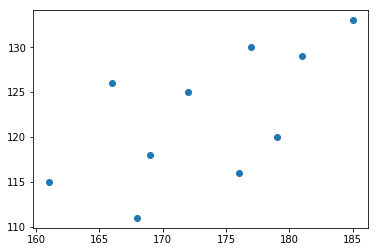

In [32]:
# example
# 父親の身長xとその息子の身長yについて相関があるかどうかを有意水準alpha=0.05, 0.01の場合について調べる

x = np.array([168, 172, 181, 179, 166, 185, 177, 176, 169, 161])
y = np.array([111, 125, 129, 120, 126, 133, 130, 116, 118, 115])

# scatter plot
plt.scatter(x, y)

# calculating corr-coef and p value
corr, pval = scipy.stats.pearsonr(x, y)

print("corr. coef = {}, p value = {}".format(corr, pval))

この結果からは$\alpha=0.05$の時は$H_0$(無相関)を棄却して相関があると言えるが、$\alpha=0.01$なら$H_0$は棄却できない。   
実際にはこのデータを取り巻く条件などを考慮して判定することになる。